# Imports

#### Loading the data from kaggle

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kundanbedmutha/exam-score-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/ender/.cache/kagglehub/datasets/kundanbedmutha/exam-score-prediction-dataset/versions/2


In [2]:
path

'/home/ender/.cache/kagglehub/datasets/kundanbedmutha/exam-score-prediction-dataset/versions/2'

#### Actual imports

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Data Processing

In [4]:
df_raw = pd.read_csv(f"{path}/Exam_Score_Prediction.csv")

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [6]:
df_raw

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19997,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,19998,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19999,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,20000,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0


### Mapping, assigning strings to_numeric

Dropping not necessary columns 

In [7]:
df_raw.drop(labels=["course", "study_method", "facility_rating", "student_id"], axis=1, inplace=True)

In [13]:
df = df_raw.copy()

mapping_gender = {"male" : 0, "other" : 1, "female" : 2}
df['gender'] = df_raw['gender'].map(mapping_gender)

mapping_internet_acc = {"yes" : 1, "no" : 0}
df['internet_access'] = df_raw['internet_access'].map(mapping_internet_acc)

mapping_sleep_q = {"poor" : 0, "average" : 1, "good" : 2}
df['sleep_quality'] = df_raw['sleep_quality'].map(mapping_sleep_q)

#mapping_study_m = {"coaching" : 0, "online videos" : 1, "mixed" : 2, "self-study" : 3, "group study" : 4}
#df['study_method'] : df_raw['study_method'].map(mapping_study_m)

mapping_exam_d = {"easy" : 0, "moderate" : 1, "hard" : 2}
df['exam_difficulty'] =  df_raw['exam_difficulty'].map(mapping_exam_d)

In [14]:
df.head()

,age,gender,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,exam_difficulty,exam_score
0,17,0,2.78,92.9,1,7.4,0,2,58.9
1,23,1,3.37,64.8,1,4.6,1,1,54.8
2,22,0,7.88,76.8,1,8.5,0,1,90.3
3,20,1,0.67,48.4,1,5.8,1,1,29.7
4,20,2,0.89,71.6,1,9.8,0,1,43.7


In [15]:
df_raw.head()

,age,gender,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,exam_difficulty,exam_score
0,17,male,2.78,92.9,yes,7.4,poor,hard,58.9
1,23,other,3.37,64.8,yes,4.6,average,moderate,54.8
2,22,male,7.88,76.8,yes,8.5,poor,moderate,90.3
3,20,other,0.67,48.4,yes,5.8,average,moderate,29.7
4,20,female,0.89,71.6,yes,9.8,poor,moderate,43.7


Dropping unnecessary columns

#### Checking correlations | Heatmap

In [16]:
df_correlated = df.corr()

Text(0.5, 1.0, 'Correlations')

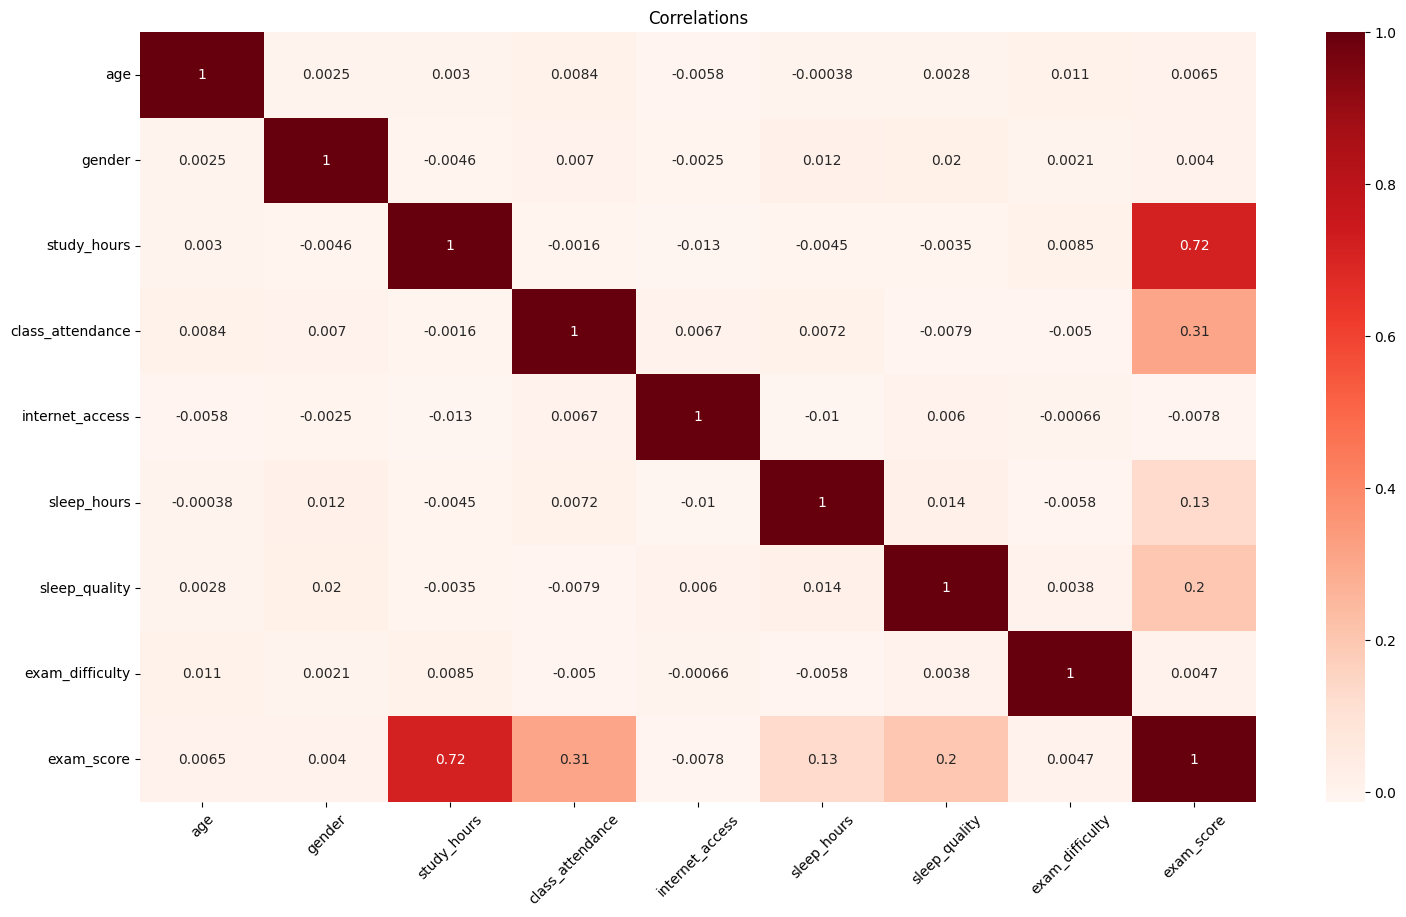

In [17]:
plt.figure(figsize=(18, 10))
sns.heatmap(df_correlated, fmt='.2g', cmap="Reds", annot=True)
plt.xticks(rotation=45)
plt.title("Correlations")

Damn, no comment, we can see that actually study hours has a great effect on the exam scores, a whopping 0.72, while class attendance holds the leftover 0.31, incredible. 

#### Boxplot

Exam scores dependance on features for each gender

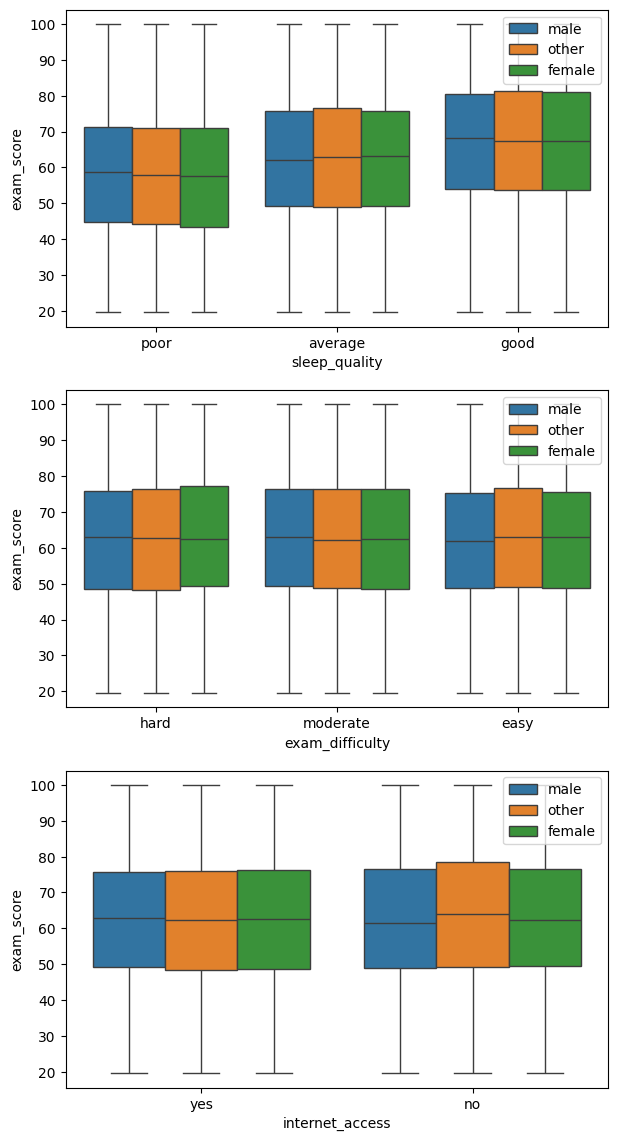

In [91]:
fig, axes = plt.subplots(nrows=3, figsize=(7, 14))

ax = sns.boxplot(data=df_raw, x="sleep_quality", y="exam_score", hue="gender", ax=axes[0])
ax.legend(loc="upper right")

ax = sns.boxplot(data=df_raw, x="exam_difficulty", y="exam_score", hue="gender", ax=axes[1])
ax.legend(loc="upper right")

ax = sns.boxplot(data=df_raw, x="internet_access", y="exam_score", hue="gender", ax=axes[2])
ax.legend(loc="upper right")

#### Histogram

Text(0.5, 1.0, 'Exam scores for each gender by the count')

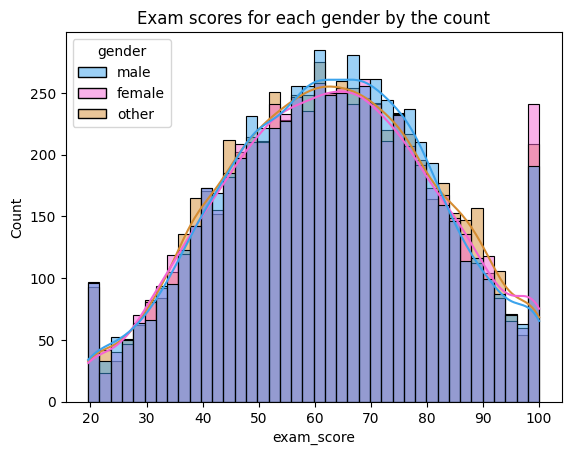

In [147]:
male = sns.color_palette("husl", 9)[6]
female = sns.color_palette("husl", 9)[8]
other = sns.color_palette("husl", 9)[1]

sns.histplot(data=df_raw, x="exam_score", hue="gender", palette=[male, female, other], kde=True, hue_order=["male", "female", "other"],)
plt.title("Exam scores for each gender by the count")

Text(0.5, 1.0, 'Exam scores for each gender by the count')

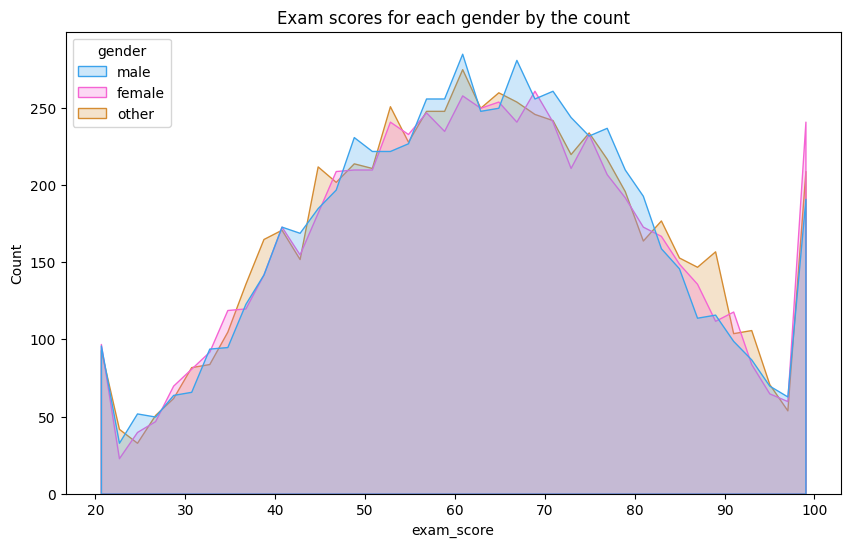

In [150]:
male = sns.color_palette("husl", 9)[6]
female = sns.color_palette("husl", 9)[8]
other = sns.color_palette("husl", 9)[1]

plt.figure(figsize=(10, 6))
sns.histplot(data=df_raw, x="exam_score", hue="gender", palette=[male, female, other], hue_order=["male", "female", "other"], element="poly")
plt.title("Exam scores for each gender by the count")

Text(0.5, 1.0, 'Exam scores for each gender by the count')

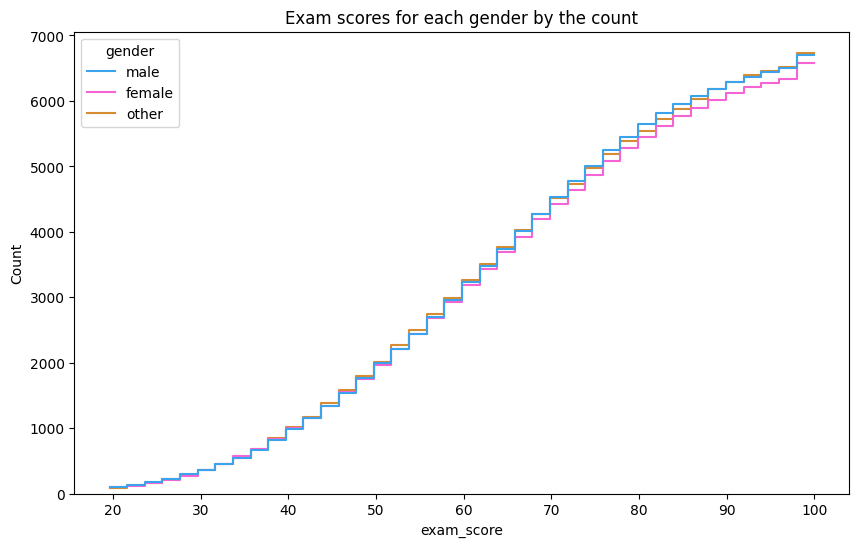

In [160]:
male = sns.color_palette("husl", 9)[6]
female = sns.color_palette("husl", 9)[8]
other = sns.color_palette("husl", 9)[1]

plt.figure(figsize=(10, 6))
sns.histplot(data=df_raw, 
             x="exam_score", 
             hue="gender", 
             palette=[male, female, other], 
             hue_order=["male", "female", "other"], 
             element="step", 
             common_norm=False, 
             cumulative=True, 
             fill=False,)
plt.title("Exam scores for each gender by the count")



<Axes: xlabel='internet_access', ylabel='Count'>

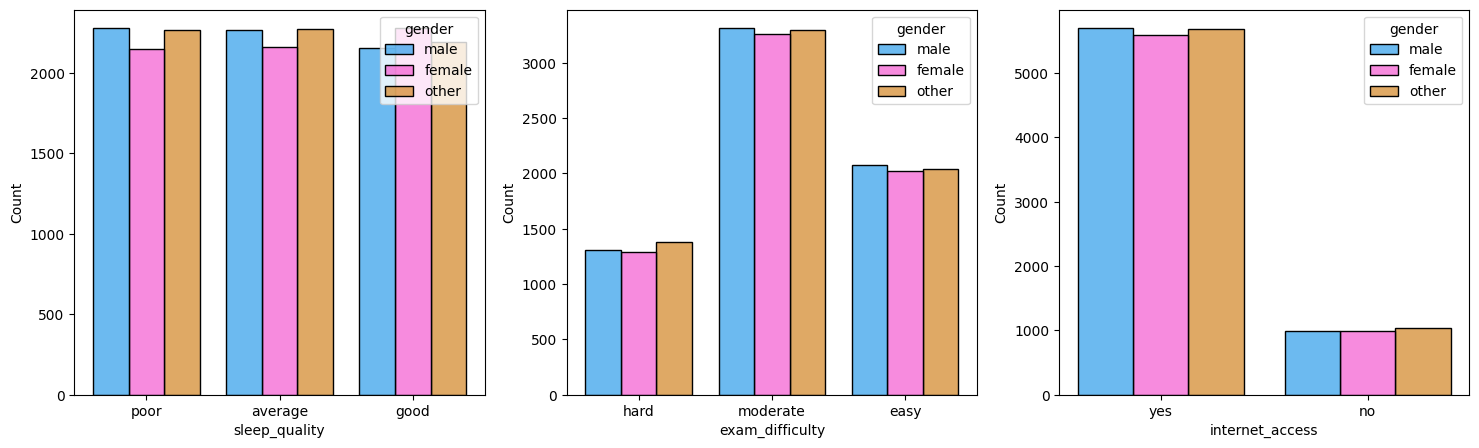

In [173]:
male = sns.color_palette("husl", 9)[6]
female = sns.color_palette("husl", 9)[8]
other = sns.color_palette("husl", 9)[1]

fig, axes = plt.subplots(ncols=3, figsize=(18, 5))

sns.histplot(data=df_raw, 
             x="sleep_quality",
             hue="gender", 
             multiple="dodge",
             shrink=.8,
             palette=[male, female, other], 
             hue_order=["male", "female", "other"], 
             ax=axes[0])


sns.histplot(data=df_raw, 
             x="exam_difficulty",
             hue="gender", 
             multiple="dodge",
             shrink=.8,
             palette=[male, female, other], 
             hue_order=["male", "female", "other"], 
             ax=axes[1])


sns.histplot(data=df_raw, 
             x="internet_access",
             hue="gender", 
             multiple="dodge",
             shrink=.8,
             palette=[male, female, other], 
             hue_order=["male", "female", "other"], 
             ax=axes[2])

Text(0.5, 1.0, 'By genders')

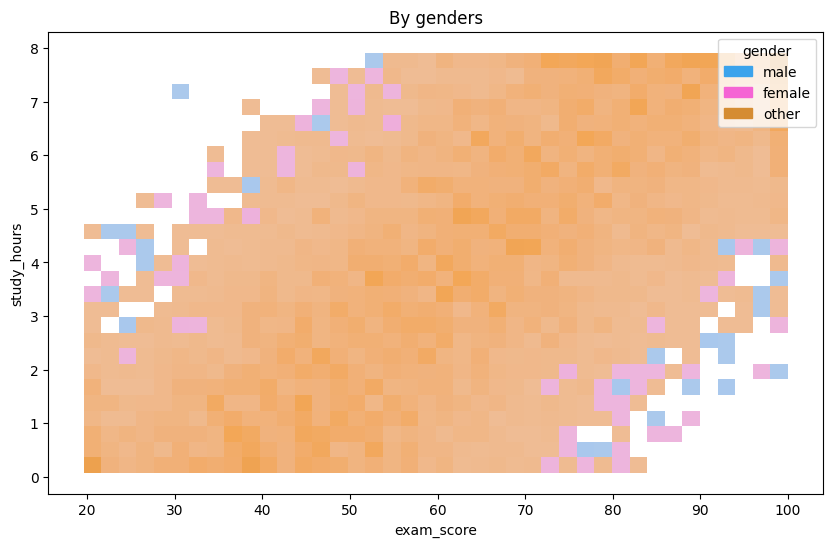

In [178]:
male = sns.color_palette("husl", 9)[6]
female = sns.color_palette("husl", 9)[8]
other = sns.color_palette("husl", 9)[1]

plt.figure(figsize=(10, 6))
sns.histplot(data=df_raw, 
             x="exam_score", 
             y="study_hours", 
             hue="gender",
             palette=[male, female, other], 
             hue_order=["male", "female", "other"],  
            )
plt.title("By genders")

<Axes: xlabel='exam_score', ylabel='study_hours'>

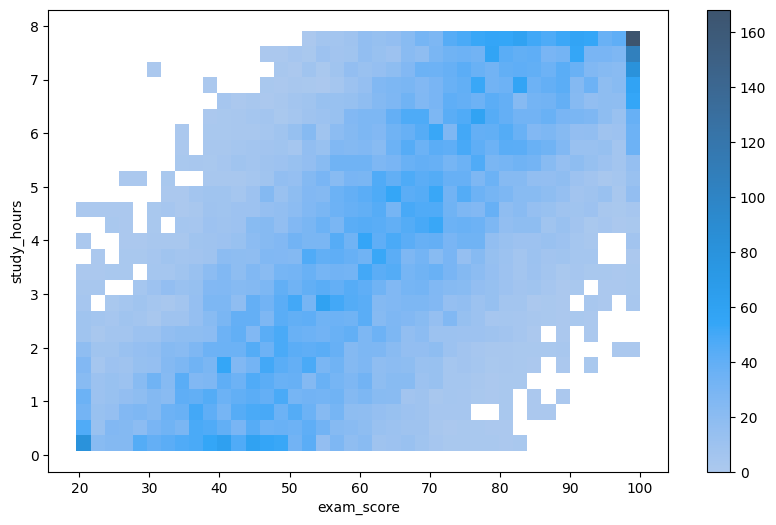

In [184]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_raw, 
             x="exam_score", 
             y="study_hours", 
             cbar=True)

<Axes: xlabel='exam_score', ylabel='age'>

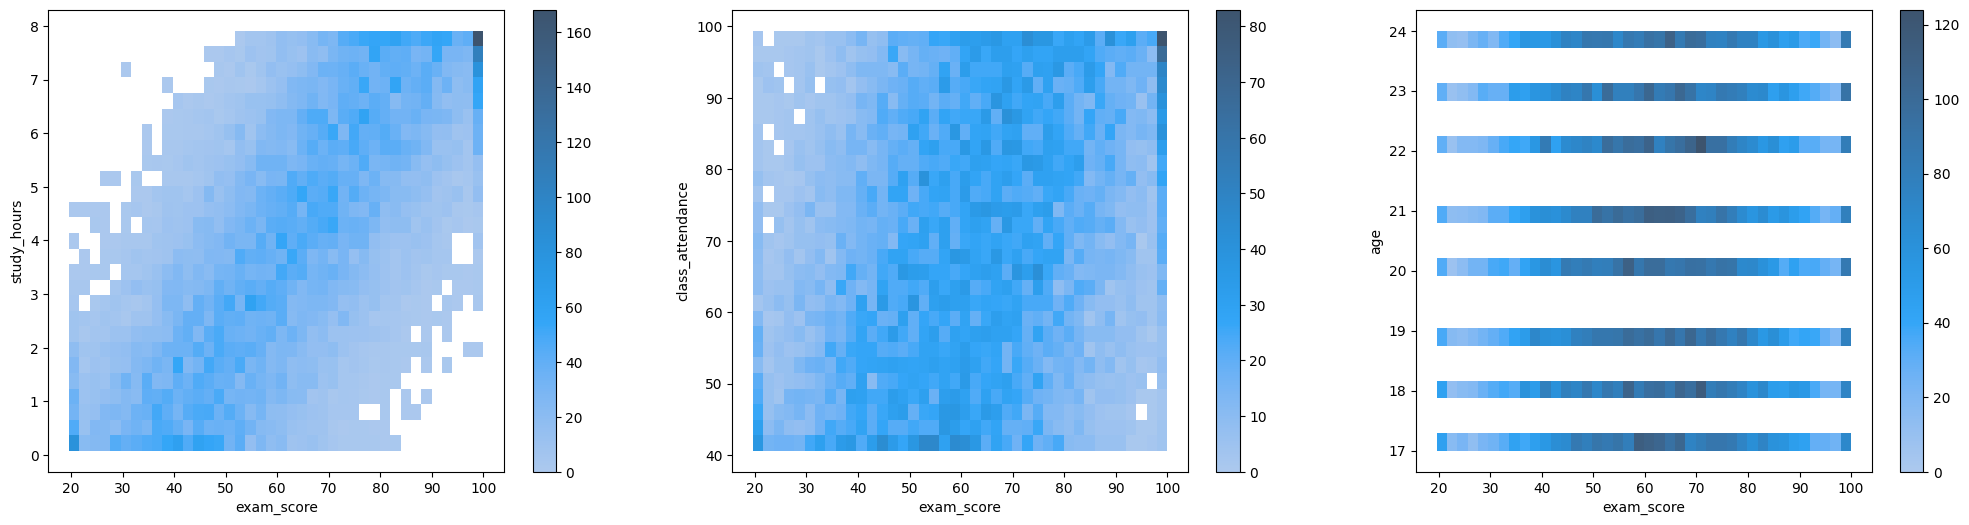

In [207]:
fig, axes = plt.subplots(ncols=3, figsize=(25, 6))

sns.histplot(data=df_raw, 
             x="exam_score", 
             y="study_hours", 
             cbar=True, 
             ax=axes[0])

sns.histplot(data=df_raw, 
             x="exam_score", 
             y="class_attendance", 
             cbar=True, 
             ax=axes[1])

sns.histplot(data=df_raw, 
             x="exam_score", 
             y="age", 
             cbar=True, 
             ax=axes[2])

<Axes: xlabel='exam_score', ylabel='gender'>

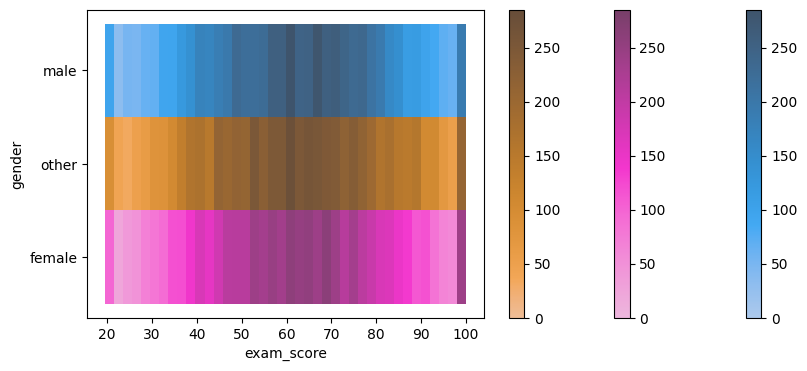

In [242]:
male = sns.color_palette("husl", 9)[6]
female = sns.color_palette("husl", 9)[8]
other = sns.color_palette("husl", 9)[1]

plt.figure(figsize=(10, 4))
sns.histplot(data=df_raw, 
             x="exam_score", 
             y="gender", 
             hue="gender",
             palette=[male, female, other], 
             hue_order=["male", "female", "other"], 
             cbar=True,
             legend=False,
            )

#### Scatterplot

<Axes: xlabel='exam_score', ylabel='study_hours'>

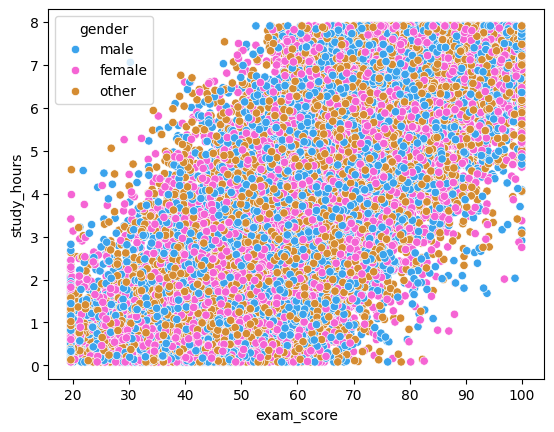

In [256]:
male = sns.color_palette("husl", 9)[6]
female = sns.color_palette("husl", 9)[8]
other = sns.color_palette("husl", 9)[1]


sns.scatterplot(
    data=df_raw, 
    x="exam_score", 
    y="study_hours", 
    hue="gender",
    hue_order=["male", "female", "other"],
    palette=[male, female, other]
)

<Axes: xlabel='exam_score', ylabel='study_hours'>

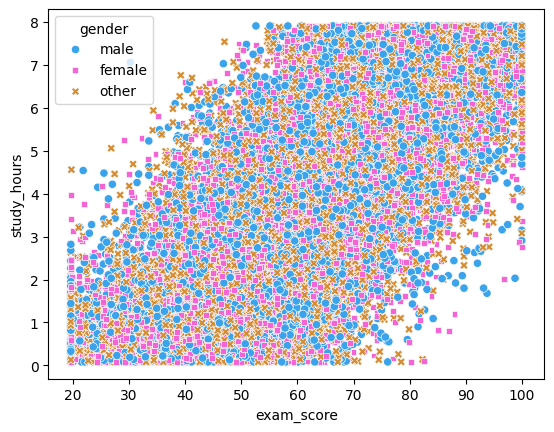

In [276]:
male = sns.color_palette("husl", 9)[6]
female = sns.color_palette("husl", 9)[8]
other = sns.color_palette("husl", 9)[1]


sns.scatterplot(
    data=df_raw, 
    x="exam_score", 
    y="study_hours", 
    hue="gender",
    hue_order=["male", "female", "other"],
    palette=[male, female, other],
    style="gender",
)

<Axes: xlabel='exam_score', ylabel='study_hours'>

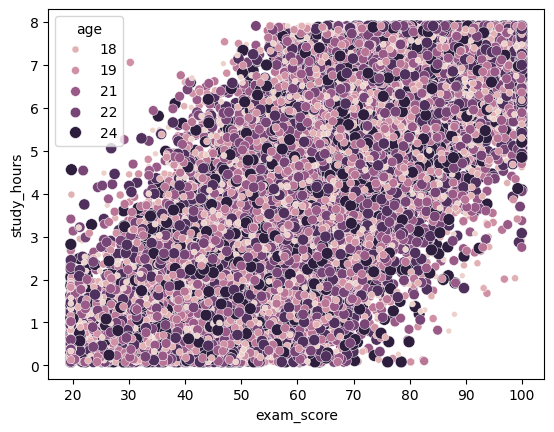

In [286]:
sns.scatterplot(
    data=df_raw, 
    x="exam_score", 
    y="study_hours", 
    hue="age",
    size="age",
)

<Axes: xlabel='exam_score', ylabel='study_hours'>

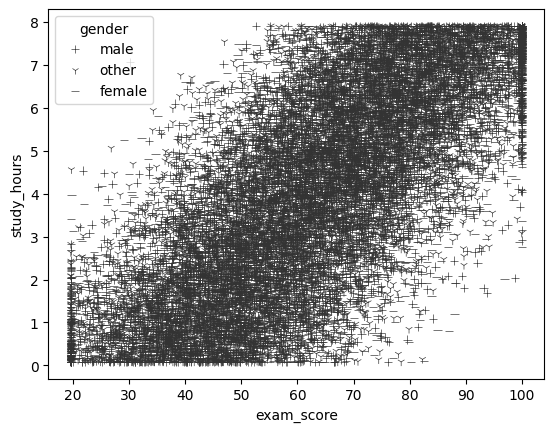

In [295]:
male = sns.color_palette("husl", 9)[6]
female = sns.color_palette("husl", 9)[8]
other = sns.color_palette("husl", 9)[1]

markers = {"male" : "+", "female" : "_", "other" : "1"}
sns.scatterplot(
    data=df_raw, 
    x="exam_score", 
    y="study_hours", 
    style="gender",
    markers = markers,
    color=".2",
)

wtf?

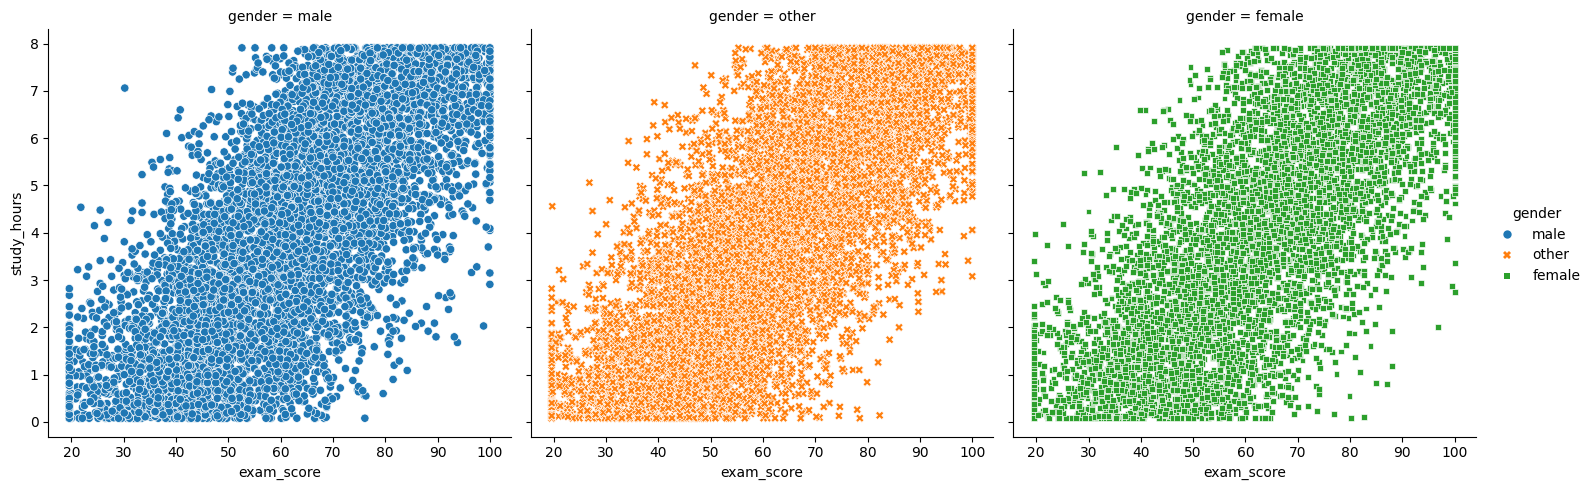

In [300]:
sns.relplot(
    data=df_raw,
    x="exam_score",
    y="study_hours",
    col="gender",
    hue="gender",
    style="gender",
    kind="scatter",
)

Still wtf, but, maybe usefull. Actually, this is the most useless shit ever honestly specifically with this large amounf of data

Text(0.5, 1.0, 'Exam scores by internet accessability and study hours')

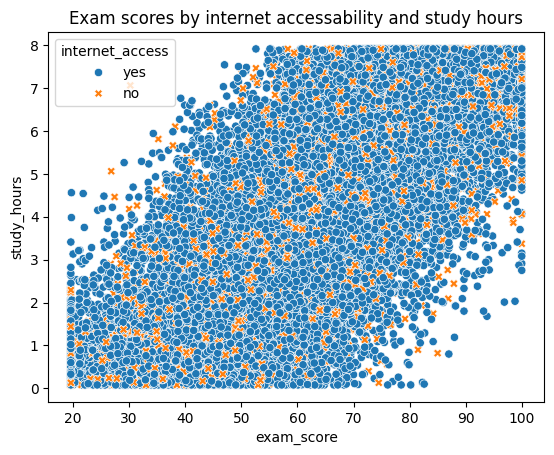

In [302]:
male = sns.color_palette("husl", 9)[6]
female = sns.color_palette("husl", 9)[8]
other = sns.color_palette("husl", 9)[1]


sns.scatterplot(
    data=df_raw, 
    x="exam_score", 
    y="study_hours", 
    hue="internet_access",
    style="internet_access",
)
plt.title("Exam scores by internet accessability and study hours")

P/S: That person with less than 4 hours of studying and no internet access, hitting the absolute 100 in the exam, goated, please clap!

That's all, I couldn't get much more visual data from this, you can only learn about its median because it's obvious, maybe my knowledge is still bad at it but hey, at least I did it!

I came down to the conclusion that I personally do not fw scatterplot for more than 3 dimensional data, because it's useless

#### Barplot

<Axes: xlabel='age', ylabel='sleep_hours'>

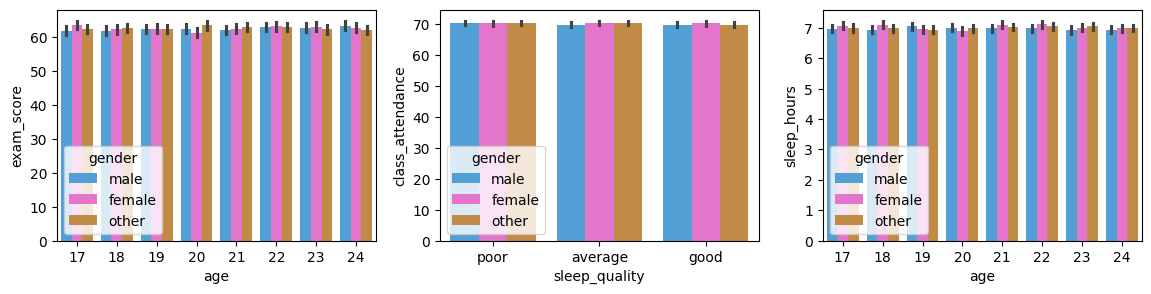

In [340]:
male = sns.color_palette("husl", 9)[6]
female = sns.color_palette("husl", 9)[8]
other = sns.color_palette("husl", 9)[1]

fig, axes = plt.subplots(ncols=3, figsize=(14, 3))
sns.barplot(
    data=df_raw,
    x="age", 
    y="exam_score", 
    hue="gender", 
#    estimator = "sum",
    hue_order = ["male", "female", "other"],
    palette=[male, female, other],
    ax=axes[0],
)

sns.barplot(
    data=df_raw,
    x="sleep_quality", 
    y="class_attendance", 
    hue="gender",  
#    estimator = "sum",
    hue_order = ["male", "female", "other"],
    palette=[male, female, other],
    ax=axes[1],
)

sns.barplot(
    data=df_raw,
    x="age", 
    y="sleep_hours", 
    hue="gender",  
#    estimator = "sum",
    hue_order = ["male", "female", "other"],
    palette=[male, female, other],
    ax=axes[2],
)

Pretty useless with this dataset again? ahh, I will use them in another dataset 

#### Pie

#### KDE

#### Pairplot

#### Jointplot

#### Counterplot